# Augmented Dickey-Fuller Test

데이터가 stationary 인지 아니면 non-stationary인지 빠르게 확인하는 방법중에 하나가 Dickey-Fuller Test (ADF Test) 입니다.<br>
가설은 다음과 같습니다.

| Type | Description |
|:-----|:------------|
| **Null Hypothesis(H0)** | 만약 accepted된다면, 해당 time-series data는 unit root으로 표현될수 있다. <br>즉 stationary하지 않다는 것으로 time-dependent structure를 갖고 있다. |
| **Alternate Hypothesis (H1)** | 해당 time-series 데이터는 unit root을 갖고 있지 않으며, time-dependent structure도 아니다 |

ADF Test의 결과는 p-value를 갖고서 해석을 합니다. <br>
만약 p-value값이 threshold (예를 들어 5% 또는 1%)보다 작을 경우 null hypothesis를 reject할 수 있지만, <br>
이상이라면, null hypothesis를 accept하게 됩니다.

* **p-value > 0.05**: Null Hypothesis (H0)를 accept하며, unit root을 갖고 있으며, **non-stationary**입니다.
* **p-value <= 0.05**: Null Hypothesis (H0)를 reject하게 되며, uni root을 갖고 있지 않으며, **stationary** 입니다.

## Configuration

In [1]:
LAG = 12

## Import

In [2]:
%pylab inline
import math
import pandas as pd

from statsmodels import api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from data import get_data, diff, show_diff

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data

            passenger
1949-01-01      112.0
1949-02-01      118.0
1949-03-01      132.0
1949-04-01      129.0
1949-05-01      121.0


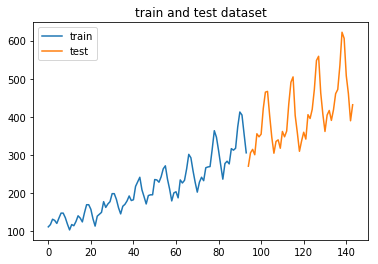

In [12]:
filename = 'dataset/international-airline-passengers.csv'
dataframe, train, test, ts_train, ts_test = get_data(filename, LAG)

# train_diff = diff(train ,12)
# test_diff = diff(test, 12)

# Visualization
print(dataframe.head())
# show_diff(train_diff, test_diff)
plot(np.arange(len(train)), train, label='train')
plot(np.arange(len(train), len(train)+len(test)), test, label='test')
legend()
title('train and test dataset')

## Dickey-Fuller Test

중요하게 볼 부분은 다음과 같습니다.

1. **test statistic**: 더 negative statistic일 수록 null hypothesis를 reject합니다. (값은 낮을 수록 좋다) 
2. **P-Value**: 0.05 이하면 null hypothesis를 reject합니다.
3. **Critical Values**: 유의수준 (significance level)을 의미하며, 표본통계량이 기각역(rejection area)에 들어갈 확률.. 즉 오차가능성을 의미합니다. 보통 1% 5%내외로 기준을 잡으며, test statistic이 critical values보다 더 낮을경우 null hypothesis을 reject를 정당화 할수 있습니다.

statistic: -2.2192230046
P Value  : 0.199342734511
Critical Values
   1% : -3.5149
   5% : -2.8984
   10%: -2.5864
Icbest: 579.28433691


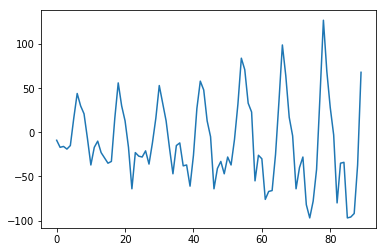

In [22]:
test_data = diff(train, 4)

plot(test_data)
adf = sm.tsa.stattools.adfuller(test_data)

print('statistic:', adf[0])
print('P Value  :', adf[1])
print('Critical Values')
for k, v in adf[4].items():
    print(f'   {k:3}: {v:.5}')
print('Icbest:', adf[5])